# Predicting creditcards approval v2

Plan
1. Data already cleaned from previous notebook
2. EDA
3. Come up with some sense of the dataset before going into building models
4. Define problem statement and come up with assumptions
<br>
<br>
5. Preprocessing what more can we do - dimensional reduction, NMF??
6. Fine tune each model's parameters to squeeze out the best for each model
7. Compare different classification models - knn, logistic regression 

## Get data from cleaned source

In [38]:
# import packages
import pandas as pd
# read csv
df = pd.read_csv('cc_approvals_cleaned.csv')
print(df.head())
print('-'*40)
print(df.info())

  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income ApprovalStatus  
0      202       0              +  
1       43     560        

In [39]:
# change zipcode to string again, got reseted when reloaded csv
df.ZipCode = df.ZipCode.astype('str')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          664 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            664 non-null    float64
 3   Married         664 non-null    object 
 4   BankCustomer    664 non-null    object 
 5   EducationLevel  664 non-null    object 
 6   Ethnicity       664 non-null    object 
 7   YearsEmployed   664 non-null    float64
 8   PriorDefault    664 non-null    object 
 9   Employed        664 non-null    object 
 10  CreditScore     664 non-null    int64  
 11  DriversLicense  664 non-null    object 
 12  Citizen         664 non-null    object 
 13  ZipCode         664 non-null    object 
 14  Income          664 non-null    int64  
 15  ApprovalStatus  664 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 83.1+ KB
None


## Problem statement
1. Who are our creditcards customers?
2. Which features influenced approval decision?
3. Given application data, develop a classification model to predict creditcard approval to save manual application revision time.


## EDA

1. Most of applicants are under 40 years old
2. Median income is 5.00 !!!!

In [40]:
# Inspect data
print(df.describe())
print(df.describe(include=['O']))

              Age        Debt  YearsEmployed  CreditScore         Income
count  653.000000  664.000000     664.000000   664.000000     664.000000
mean    31.503813    4.799285       2.261777     2.468373    1003.585843
std     11.838267    5.004580       3.367623     4.935685    5211.191653
min     13.750000    0.000000       0.000000     0.000000       0.000000
25%     22.580000    1.000000       0.165000     0.000000       0.000000
50%     28.420000    2.855000       1.000000     0.000000       5.000000
75%     38.250000    7.122500       2.750000     3.000000     397.000000
max     76.750000   28.000000      28.500000    67.000000  100000.000000
       Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
count     664     664          664            664       664          664   
unique      2       3            3             14         9            2   
top         b       u            g              c         v            t   
freq      459     506          506     

In [41]:
# Separate categorical and numerical features
cat_feats = []
num_feats = []
for col in df.columns:
    if col == 'ApprovalStatus':
        pass # this is our target variable
    elif df[col].dtype == object:
        # print(col, 'is a cat feat')
        cat_feats.append(col)
    else:
        # print(col, 'is a num feat')
        num_feats.append(col)
print('Categorical features:', cat_feats)
print('Numerical features:', num_feats)

Categorical features: ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']
Numerical features: ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


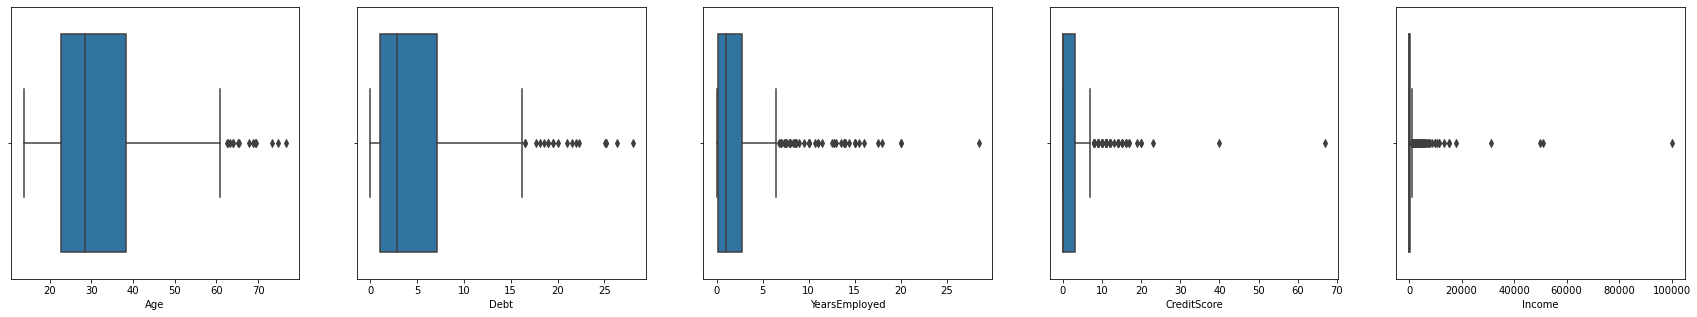

In [42]:
# Visualize numerical features to find outliers
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=len(num_feats), figsize=(30,5))
for i in range(len(num_feats)):
    _ = sns.boxplot(data=df, x=num_feats[i], ax=ax[i])
plt.show()

In [43]:
# Visualize ApprovalStatus in terms of cat feature
for cat_feat in cat_feats:
    # if df[cat_feat].nunique() < 7:
        # _ = sns.catplot(data=df, x='ApprovalStatus', kind='count', col=cat_feat)
        # plt.show()
    print(pd.crosstab(index=df[cat_feat], columns=df['ApprovalStatus']))
        

ApprovalStatus    +    -
Gender                  
a                95  110
b               203  256
ApprovalStatus    +    -
Married                 
l                 2    0
u               251  255
y                45  111
ApprovalStatus    +    -
BankCustomer            
g               251  255
gg                2    0
p                45  111
ApprovalStatus   +   -
EducationLevel        
aa              19  34
c               60  74
cc              29  11
d                7  22
e               14  10
ff               7  44
i               14  43
j                3   7
k               13  36
m               16  22
q               49  26
r                2   1
w               33  30
x               32   6
ApprovalStatus    +    -
Ethnicity               
bb               24   31
dd                2    4
ff                8   47
h                87   50
j                 3    5
n                 2    2
o                 1    1
v               165  224
z                 6    2
Approva

Cat features value has no meaning we can infer on .....

Base model in last notebook managed to get around 84% accuracy.<br>
See how can we improve on that.

## Preprocessing
1. Drop zipcode - so many
2. Label encode cat features
3. Mean impute num features

In [53]:
# separate cat and num features and drop ZipCode
X_num = df.loc[:, num_feats]
X_cat = df.loc[:, cat_feats]
X_cat = X_cat.drop(['ZipCode'], axis=1)
cat_feats.remove('ZipCode')


In [54]:
# try label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
for cat_feat in cat_feats:
    le = LabelEncoder()
    X_cat[cat_feat] = le.fit_transform(X_cat[cat_feat])